<a href="https://colab.research.google.com/github/ajay-aju-0/data-science/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sn

In [ ]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train=x_train/255
x_test=x_test/255 

In [ ]:
model= keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(100,activation='relu'),
                          keras.layers.Dense(10,activation='sigmoid')])
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(x_train,y_train,epochs=5) 

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2692 - accuracy: 0.9240
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1260 - accuracy: 0.9623
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0891 - accuracy: 0.9725
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0679 - accuracy: 0.9791
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0524 - accuracy: 0.9836


In [ ]:
model.evaluate(x_test,y_test)
y_pred=model.predict(x_test)
np.argmax(y_pred[1])

313/313 [==============================] - 1s 2ms/step


2

In [ ]:
y_pred_labels=[np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels) 
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    3,    1,    1,    1,    4,    2,    3,    1],
       [   0, 1119,    4,    2,    0,    1,    3,    0,    6,    0],
       [   0,    0, 1016,    0,    1,    0,    1,    4,   10,    0],
       [   0,    0,    8,  989,    0,    2,    0,    4,    6,    1],
       [   0,    0,    4,    1,  953,    0,    5,    2,    0,   17],
       [   2,    0,    0,   17,    3,  856,    5,    1,    6,    2],
       [   4,    2,    2,    1,    3,    3,  941,    0,    2,    0],
       [   0,    2,   16,    2,    1,    0,    0,  988,    6,   13],
       [   2,    0,    4,    5,    3,    4,    3,    3,  947,    3],
       [   1,    1,    0,    4,    4,    4,    1,    2,    4,  988]],
      dtype=int32)>

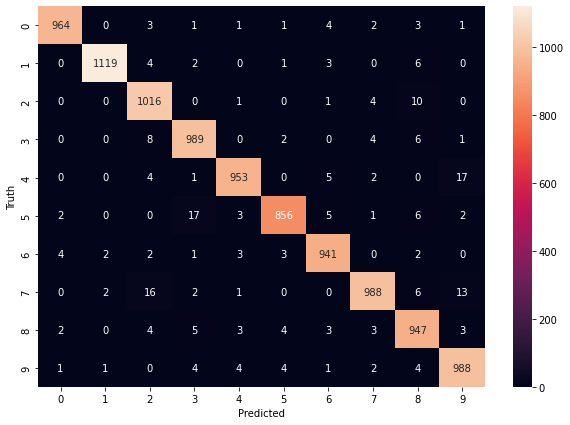

In [ ]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show() 